<a href="https://colab.research.google.com/github/ShahistaAfreen/DL_A1/blob/main/DL_A1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import wandb
import seaborn as sns

In [23]:
import wandb
wandb.login() # Login

True

**Data Preprocessing**

In [24]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flattening the data
num_features = 784  # 28x28 images flattened
X_train = X_train.reshape(X_train.shape[0], num_features).T
X_test = X_test.reshape(X_test.shape[0], num_features).T

# Split training into 90% train, 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_train.T, y_train, test_size=0.1, random_state=42)
X_train, X_val = X_train.T, X_val.T

# Number of training, validation, and test examples
M = X_train.shape[1]
Mval = X_val.shape[1]
Mtest = X_test.shape[1]

# Number of classes
num_classes = len(np.unique(y_train))

# One-hot encoding for class labels
y_train_one_hot = np.zeros((num_classes, M))
y_train_one_hot[y_train, np.arange(M)] = 1

y_val_one_hot = np.zeros((num_classes, Mval))
y_val_one_hot[y_val, np.arange(Mval)] = 1

y_test_one_hot = np.zeros((num_classes, Mtest))
y_test_one_hot[y_test, np.arange(Mtest)] = 1

print("Number of images in the training set =", X_train.shape[1])
print("Number of images in the validation set =", X_val.shape[1])
print("Number of images in the test set =", X_test.shape[1])
print("Number of classes =", num_classes)
print("Number of features per example =", num_features)


Number of images in the training set = 54000
Number of images in the validation set = 6000
Number of images in the test set = 10000
Number of classes = 10
Number of features per example = 784


**Class Names**

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Function that returns the 1st indices of the each class**

In [26]:
def find_first_indexes(lst):
    first_indexes = {}

    for i, val in enumerate(lst):
        if val in range(10) and val not in first_indexes:
            first_indexes[val] = i

        if len(first_indexes) == 10:  # Stop once we have all 10 values
            break

    return first_indexes

**Printing in colab using Matplotlib**

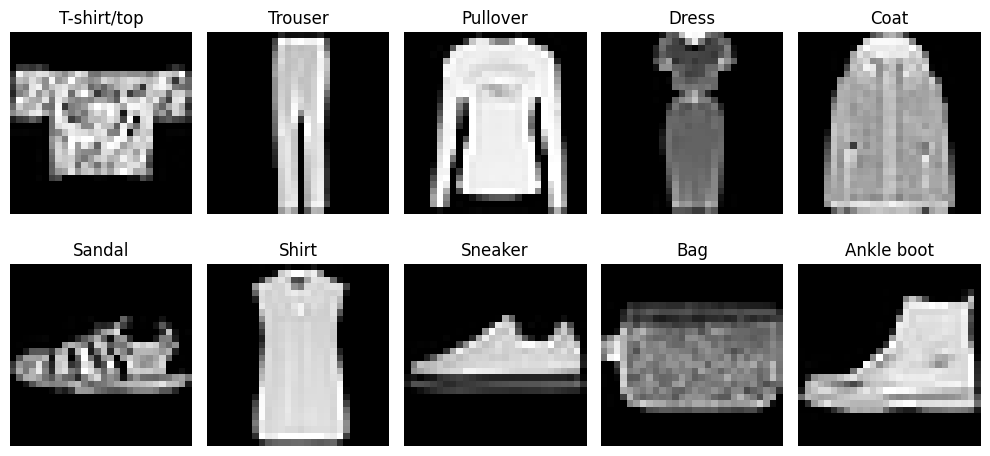

In [27]:
# Get first indexes
first_indexes = find_first_indexes(y_train)

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for class_num, idx in first_indexes.items():
    row, col = divmod(class_num, 5)  # Position in the 2x5 grid
    axes[row, col].imshow(X_train[:, idx].reshape(28, 28), cmap="gray")
    axes[row, col].set_title(class_names[class_num])
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

In [29]:
# Initialize a new wandb run
run = wandb.init(
    project="Plotting images from each class",
    notes="Logging one sample image per class",
    config={}
)

# Store the index of the first occurrence of each class
first_indices = find_first_indexes(y_train)

# Prepare images and captions
images = []
captions = []
for index in first_indices:
    images.append(X_train.T[index].reshape((28, 28)))  # Reshape to 28x28 for visualization
    captions.append(class_names[y_train[index]])

# Log images to Weights & Biases
wandb.log({
    "Sample Image from each class": [
        wandb.Image(image, caption=caption) for image, caption in zip(images, captions)
    ]
})

CommError: Run initialization has timed out after 90.0 sec. Please try increasing the timeout with the `init_timeout` setting: `wandb.init(settings=wandb.Settings(init_timeout=120))`.